In [1]:
import nltk
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Create data frame from the CSV file

In [3]:
df = pd.read_csv("training.csv", encoding='iso-8859-1')

In [4]:
df

,polarity of tweet,id of the tweet,date of the tweet,query,user,text_of_the_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
158794,0,1956685485,Thu May 28 22:26:21 PDT 2009,NO_QUERY,Unknown_Heather,"@mandyxclear Was funny, he ODd and died years ..."
158795,0,1956685634,Thu May 28 22:26:22 PDT 2009,NO_QUERY,jesuisfei,@NotARichGirl The shampoo I used was the sooth...
158796,0,1956685635,Thu May 28 22:26:22 PDT 2009,NO_QUERY,katiezilla,My ear hurts I hope it doesn't get infected o...
158797,0,1956685924,Thu May 28 22:26:24 PDT 2009,NO_QUERY,jennrutt,Trying to catch up on work I've been putting o...


In [ ]:
df.columns

Index(['polarity of tweet', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text_of_the_tweet'],
      dtype='object')

Dropping the Columns - ID, Date, Query and User:

In [ ]:
# df = df.drop(['id', 'date', 'query', 'user'], axis=1)

Initialize the PorterStemmer and WordNetLemmatizer

In [5]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()

Tokenize the Tweets

In [6]:
corpus = []
df['text_of_the_tweet'] = df['text_of_the_tweet'].astype(str)
for ind in df.index:
        r = re.sub('[^a-zA-Z]','',df['text_of_the_tweet'][ind])
        r = r.lower()
        r = r.split()
        r = [ps.stem(word) for word in r if word not in set(stopwords.words('english'))]
        r = " ".join(r)
        corpus.append(r)

In [7]:
corpus

['isupsetthathecantupdatehisfacebookbytextingitandmightcryasaresultschooltodayalsoblah',
 'kenichanidivedmanytimesfortheballmanagedtosavetherestgooutofbound',
 'mywholebodyfeelsitchyandlikeitsonfir',
 'nationwideclassnoitsnotbehavingatallimmadwhyamiherebecauseicantseeyoualloverther',
 'kwesideinotthewholecrew',
 'needahug',
 'loltrishheylongtimenoseeyesrainsabitonlyabitlolimfinethankshowsy',
 'ijustrepiercedmyear',
 'caregivingicouldntbeartowatchitandithoughttheualosswasembarrass',
 'octolinzititcountsidkwhyidideitheryounevertalktomeanymor',
 'smarrisoniwouldvebeenthefirstbutididnthaveagunnotreallythoughzacsnydersjustadoucheclown',
 'iamjazzyfizzleiwishigottowatchitwithyouimissyouandiamlilnickihowwasthepremier',
 'hollisdeathscenewillhurtmeseverelytowatchonfilmwryisdirectorscutnotoutnow',
 'abouttofiletax',
 'lettyaahhivealwayswantedtoseerentlovethesoundtrack',
 'fakerpattypattzohdearwereyoudrinkingoutoftheforgottentabledrink',
 'alydesignsiwasoutmostofthedaysodidntgetmuchdon',
 'oneof

Applying Bag of words

In [8]:
cv= CountVectorizer()

In [9]:
# x=cv.fit_transform(corpus).toarray()

Applying TF-IDF

In [10]:
cv = TfidfVectorizer()
x = cv.fit_transform(corpus).toarray()

Creating ML Algorithm

In [11]:
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()

In [12]:
x.shape

(158799, 2500)

In [13]:
x[0]

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
y = pd.get_dummies(df['polarity of tweet'])

In [15]:
y.shape

(158799, 3)

Applying the data into Machine Learning Algorithm for prediciton

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
s_n = MultinomialNB()

In [18]:
type(y_train)

pandas.core.frame.DataFrame

In [ ]:
print(len(x_train))

In [20]:
print(len(y_train))

127039


In [21]:
#y_train = pd.Series(y_train)
y_train = y_train.iloc[0]

In [29]:
if type(y_train) != np.ndarray or y_train.ndim != 1:
    y_train = y_train.values.reshape(-1)

In [31]:
# Assuming that x_train has more rows than y_train
x_train = x_train[:y_train.shape[0], :]

# Reshape y_train to a 2-dimensional array
y_train = y_train.reshape(-1, 1)

# Assuming that y_train has more rows than x_train
y_train = y_train[:x_train.shape[0], :]

s_n.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [32]:
y_pred = s_n.predict(x_test)

In [33]:
y_pred

array([False, False, False, ..., False, False, False])

Predicted data vs actual data

In [34]:
y_test = y_test.apply(lambda x: 1 if x.any() else 0, axis=1)
s_n.score(x_test, y_test)

0.0

Predicting the value for X[2]

In [35]:
s_n.predict(x[2].reshape(1, -1))

array([False])

In [36]:
positive = 0
negative = 0
neutral = 0

for ind in df['polarity of tweet']:
  if ind == 0:
    negative += 1
  elif ind == 2:
    neutral += 1
  elif ind == 4:
    positive += 1

In [37]:
neutral

2623

In [38]:
negative

146951

In [39]:
positive

9225

Define a function to calculate the percentage

In [40]:
def percentage(part, whole):
    return 100 * float(part) / float(whole)
positive = percentage(positive,len(df))
negative = percentage(negative,len(df))
neutral = percentage(neutral,len(df))

positive = format(positive,'.2f')
negative = format(negative,'.2f')
neutral = format(neutral,'.2f')

In [41]:
positive

'5.81'

In [42]:
negative

'92.54'

In [43]:
neutral

'1.65'

Analysis - Graphical representation of Polarity

In [44]:
print("Reaction of the people on Twitter messages by analyzing " + str(len(df)) + " Tweets\n")
print("Polarity = 0 is 'Negative\n")
print("Polarity = 2 is 'Neutral\n")
print("Polarity =40 is 'Positive\n")

Reaction of the people on Twitter messages by analyzing 158799 Tweets

Polarity = 0 is 'Negative

Polarity = 2 is 'Neutral

Polarity =40 is 'Positive



### **Getting the results of analysis:**

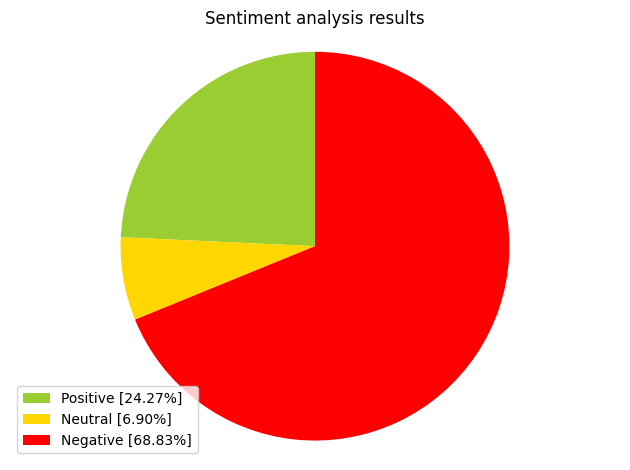

In [ ]:
Labels = ['Positive [' + str(positive) + '%]',
          'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen','gold','red']

patches,texts = plt.pie(sizes, colors = colors, startangle=90)
plt.legend(Labels, loc='best')
plt.title('Sentiment analysis results')
plt.axis('equal')
plt.tight_layout()
plt.show()
